In [1]:
# Step 9 - 2D Laplace equation

In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [5]:
def laplace2d(p, y, dx, dy, l1norm_target): 
    # l1norm_target defines how close the p matrix should be in two consecutive iterations before the loop breaks and returns the final p

    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                        dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) / 
                        (2 * (dx**2 + dy**2)))
        p[:, 0] = 0 # p = 0 @ x = 0
        p[:, -1] = y # p = y @ x = 2
        p[0, :] = p[1, :] # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :] #dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                numpy.sum(numpy.abs(pn[:])))

    return p

In [7]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

p = numpy.zeros((ny, nx))
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

p[:, 0] = 0
p[:, -1] = y
p[0, :] = p[1,:]
p[-1, :] = p[-2, :]

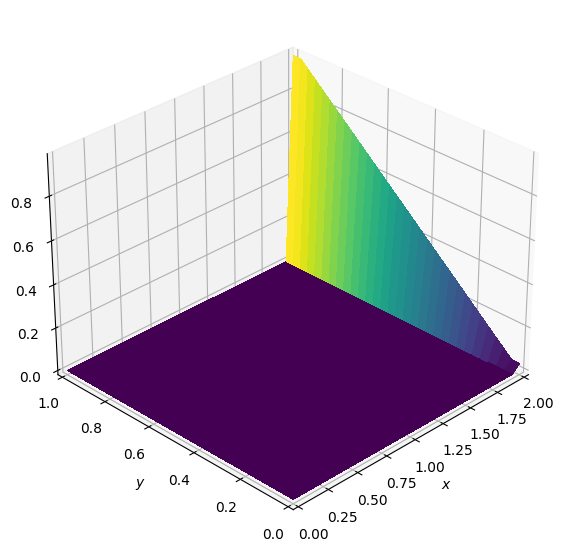

In [8]:
plot2D(x, y, p)

In [9]:
p = laplace2d(p, y, dx, dy, 1e-4)

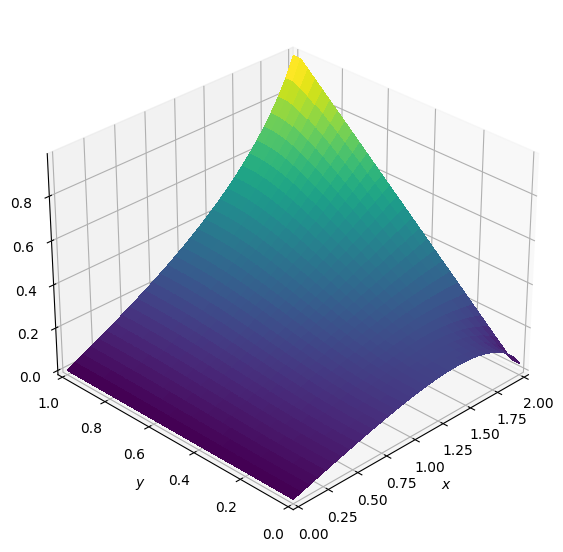

In [10]:
plot2D(x, y, p)